#  TOPIC : BANK CUSTOMER CHURN PREDICTION

### Author : Adhithyan P Saibyan
### Date     : 01/07/2024

## Table of contents

#### 1. ROW NUMBER
#### 2. CUSTOMER ID
#### 3. SURNAME
#### 4. CREDIT SCORE
#### 5. GEOGRAPHY
#### 6. GENDER
#### 7. AGE
#### 8. TENURE
#### 9. BALANCE
#### 10. NUMBER OF PRODUCTS
#### 11. HAS CREDIT CARD
#### 12. IS ACTIVE MEMBER
#### 13. ESTIMATED SALARY
#### 14. EXITED

### DATA DESCRIPTION 

#### Source :  kaggle datasets download -d shubhammeshram579/bank-customer-churn-prediction

#### Size : 268 kb

#### Rows : 10001

#### Columns : 14

## OBJECTIVE OF THE DATA

### The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Statistics about the data

In [9]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Null values in the data set

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Dropping unwanted columns

In [12]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data


In [14]:
df = pd.get_dummies(df,drop_first = True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Outliers

In [16]:
Q1 = df["EstimatedSalary"].quantile(.25)
Q3 = df["EstimatedSalary"].quantile(.75)
Q1,Q3

(51002.11, 149388.2475)

In [17]:
IQR = Q3 - Q1
IQR

98386.1375

## Some insights about the target variable

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

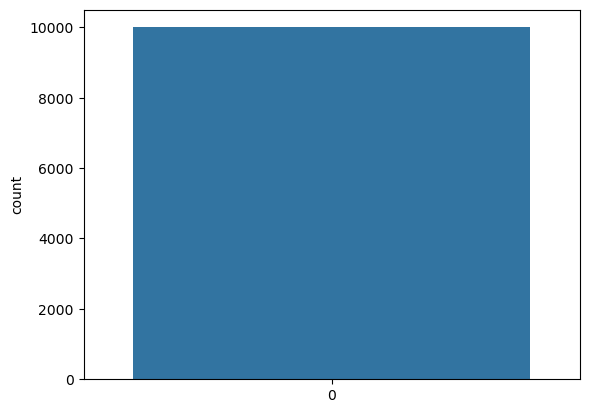

In [19]:
sns.countplot(df['Exited'])

In [20]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Data visualzation

## 1.Boxplot

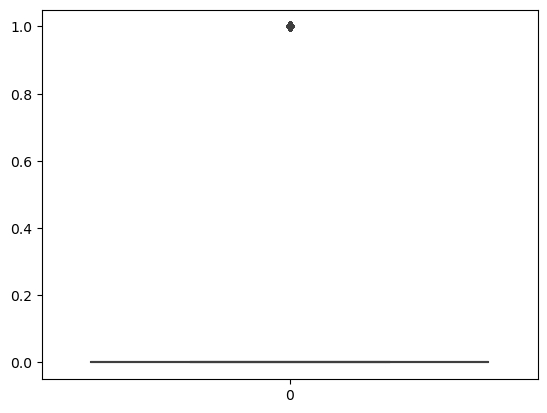

In [22]:
boxplot = sns.boxplot(df['Exited'])

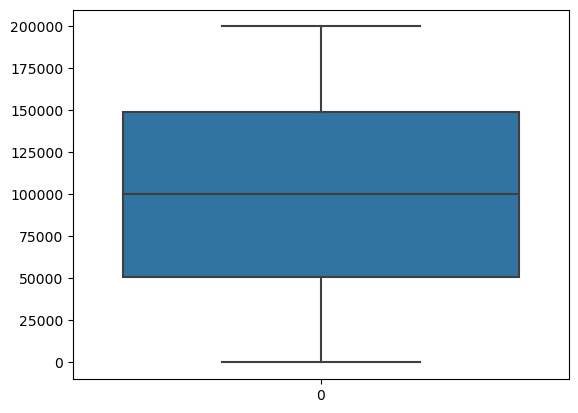

In [23]:
boxplot = sns.boxplot(df['EstimatedSalary'])

###  2.Histogram

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>],
       [<Axes: title={'center': 'Geography_Germany'}>,
        <Axes: title={'center': 'Geography_Spain'}>,
        <Axes: title={'center': 'Gender_Male'}>]], dtype=object)

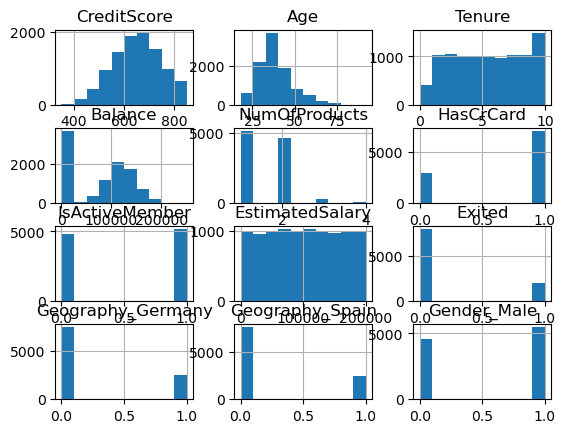

In [24]:
df.hist()

array([[<Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

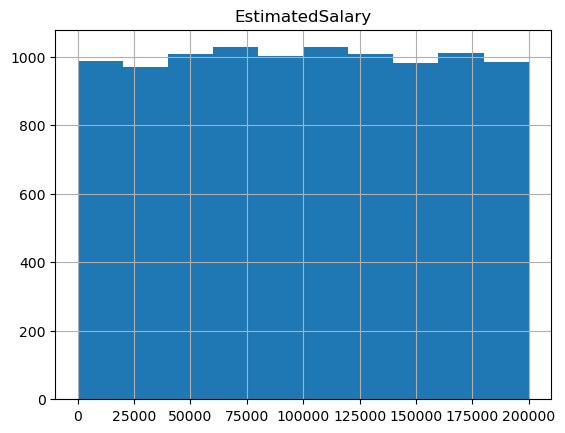

In [25]:
df.hist('EstimatedSalary')

array([[<Axes: title={'center': 'Exited'}>]], dtype=object)

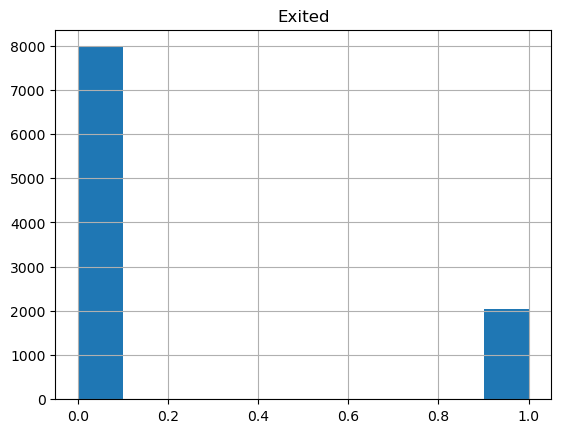

In [26]:
df.hist('Exited')

### 3.Pairplot

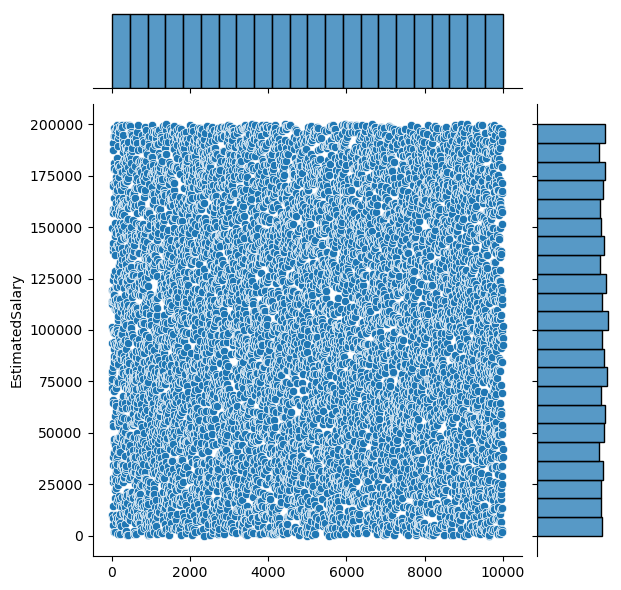

In [27]:
sns.jointplot(df["EstimatedSalary"])

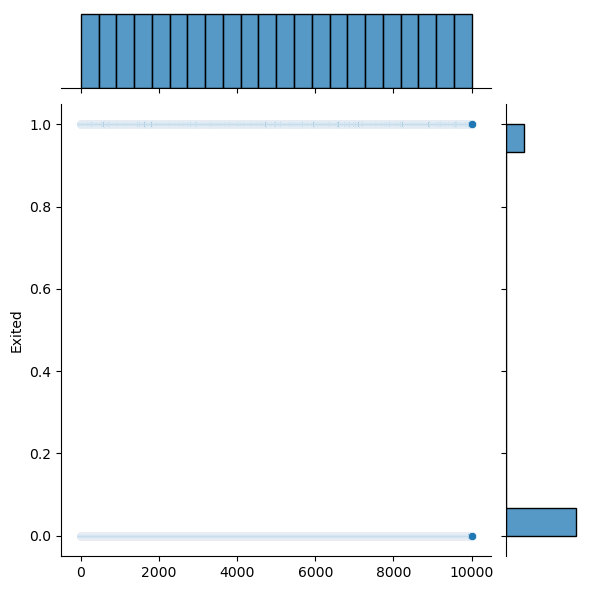

In [28]:
sns.jointplot(df["Exited"])

### 4.Pieplot

<module 'matplotlib.pyplot' from 'C:\\Users\\adhit\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

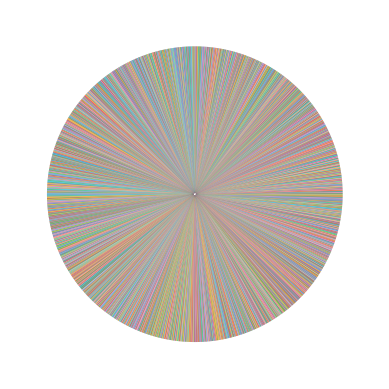

In [29]:
plt.pie(df["Exited"])
plt

In [ ]:
plt.pie(df["EstimatedSalary"])
plt

### 5.Count plot

In [ ]:
sns.countplot(df['Exited'])

### 6. Violin plot

In [ ]:
sns.violinplot(df["Exited"])

## Splitting The Dataset into Training Set and Test Set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[-1.26173328,  0.67578614,  1.73724166, ..., -0.5799896 ,
         1.74400987, -1.09728311],
       [ 2.06357923, -0.27700304,  1.73724166, ..., -0.5799896 ,
        -0.57339125, -1.09728311],
       [-0.11897883,  1.05690181, -1.38845375, ...,  1.72416885,
        -0.57339125,  0.91134183],
       ...,
       [ 1.59000531, -0.56283979,  1.73724166, ...,  1.72416885,
        -0.57339125, -1.09728311],
       [ 0.44725086, -0.75339762, -1.38845375, ..., -0.5799896 ,
        -0.57339125,  0.91134183],
       [ 1.53852988,  2.29552774, -1.38845375, ..., -0.5799896 ,
        -0.57339125, -1.09728311]])

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()

In [29]:
log.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred1 = log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred1)

0.8033333333333333

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [34]:
precision_score(y_test, y_pred1)

0.5695067264573991

In [35]:
recall_score(y_test, y_pred1)

0.20450885668276972

In [36]:
f1_score(y_test,y_pred1)

0.3009478672985782

## SVC

In [37]:
from sklearn import svm

In [38]:
svm = svm.SVC()

In [39]:
svm.fit(X_train,y_train)

SVC()

In [40]:
y_pred2=svm.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred2)

0.855

In [42]:
precision_score(y_test, y_pred2)

0.8251748251748252

In [43]:
recall_score(y_test, y_pred2)

0.38003220611916266

In [44]:
f1_score(y_test,y_pred2)

0.5203969128996692

## KNeighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred3=knn.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred3)

0.8196666666666667

In [50]:
precision_score(y_test, y_pred3)

0.6063829787234043

In [51]:
recall_score(y_test, y_pred3)

0.3671497584541063

In [52]:
f1_score(y_test,y_pred3)

0.4573721163490471

## Desicion Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred4=dt.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred4)

0.7803333333333333

In [58]:
precision_score(y_test, y_pred4)

0.47172619047619047

In [59]:
recall_score(y_test, y_pred4)

0.5104669887278583

In [60]:
f1_score(y_test,y_pred4)

0.4903325599381284

## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred5=rf.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred5)

0.858

In [66]:
precision_score(y_test, y_pred5)

0.7586206896551724

In [67]:
recall_score(y_test, y_pred5)

0.4605475040257649

In [68]:
f1_score(y_test,y_pred5)

0.5731462925851704

## Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc = GradientBoostingClassifier()

In [71]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
y_pred6=gbc.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred6)

0.8573333333333333

In [74]:
precision_score(y_test,y_pred6)

0.7658402203856749

In [75]:
recall_score(y_test,y_pred6)

0.4476650563607085

In [76]:
f1_score(y_test,y_pred6)

0.565040650406504

## Accuracy Summary

In [77]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6)
          ]
})

In [78]:
performance_summary

,Model,ACC
0,LR,0.803333
1,SVC,0.855000
2,KNN,0.819667
3,DT,0.780333
4,RF,0.858000
5,GBC,0.857333


<BarContainer object of 6 artists>

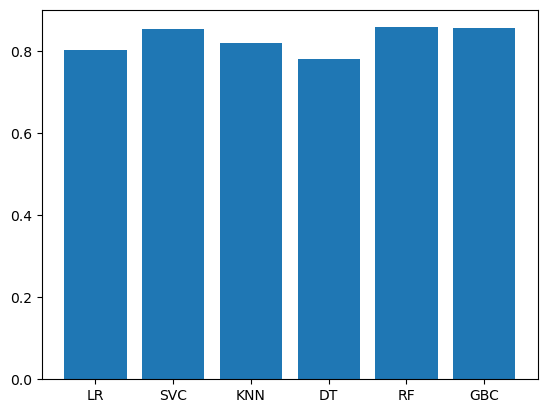

In [79]:
plt.bar(performance_summary['Model'],performance_summary['ACC'])

In [80]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6)
          ]
})

In [81]:
performance_summary

,Model,PRECISION
0,LR,0.569507
1,SVC,0.825175
2,KNN,0.606383
3,DT,0.471726
4,RF,0.758621
5,GBC,0.765840


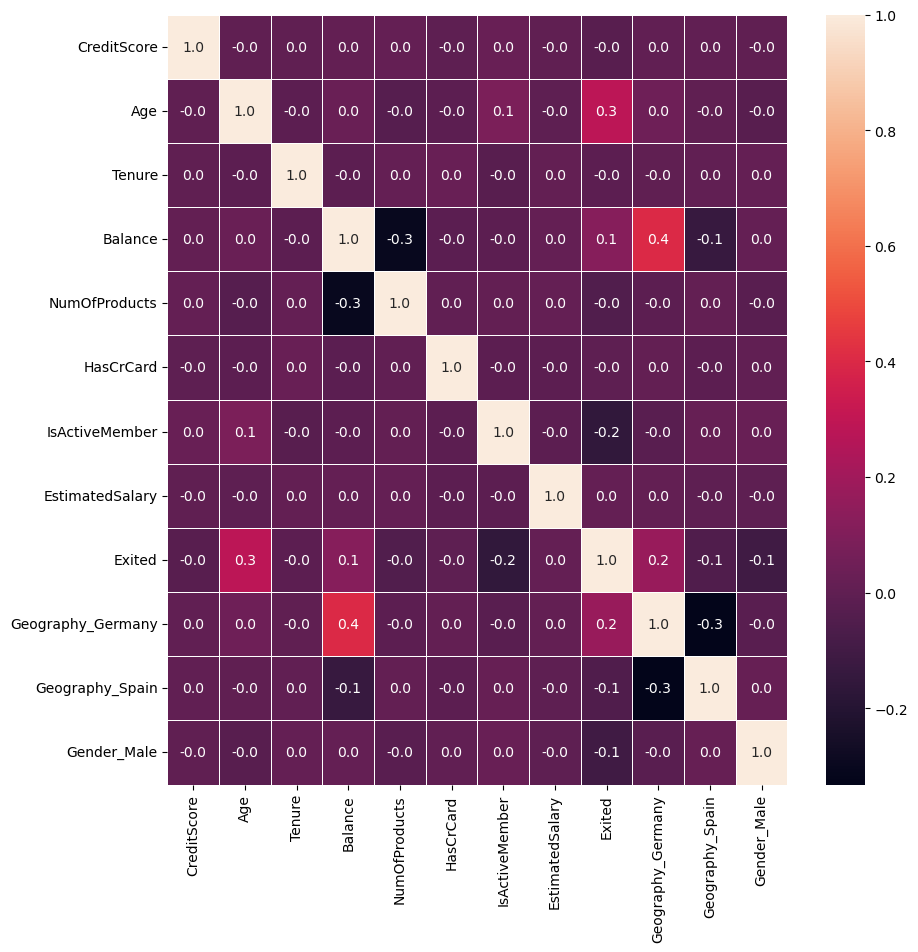

In [82]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()